In [1]:
import torch
from torch import nn

In [9]:
class MLP(nn.Module):

    def __init__(
        self,
        input_dim,
        output_dim,
        num_units=32,
    ):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(input_dim, num_units),
            nn.ReLU(),
            nn.Linear(num_units, num_units),
            nn.ReLU(),
            nn.Linear(num_units, output_dim),
        )

    def forward(self, x):
        logits = self.model(x)
        return logits


class COMPOSITE_MLP(nn.Module):

    def __init__(
        self,
        input_dim,
        obj_dim,
        obj_output_dim,
        final_output_dim,
        dtype=torch.float64,
        device='cpu'
    ):
        super().__init__()
        self.intermediate_dim = obj_dim * obj_output_dim
        self.tkwargs = {"dtype": dtype, "device": device}

        self.model_list = [MLP(input_dim, obj_output_dim).to(**self.tkwargs) for _ in range(obj_dim)]
        self.classifier = nn.Linear(self.intermediate_dim, final_output_dim).to(**self.tkwargs)

    def forward(self, x):
        intermidiate_preds = torch.stack([model(x) for model in self.model_list], dim=1)
        print(intermidiate_preds.shape)
        logits = self.classifier(intermidiate_preds.transpose(-1, -2))
        return intermidiate_preds, logits

In [10]:
model = COMPOSITE_MLP(2, 2, 1, 1)

In [4]:
input = torch.randn(6, 2, requires_grad=True).double()

In [11]:
intermdeidate, logits = model(input)

torch.Size([6, 2, 1])


In [ ]:
        nll_loss = torch.nn.functional.binary_cross_entropy_with_logits(outputs, targets, weights)
    loss = nll_loss

In [ ]:
intermdeidate - tau

In [12]:
intermdeidate

tensor([[[-0.0270],
         [-0.0831]],

        [[-0.0239],
         [-0.1040]],

        [[ 0.0142],
         [ 0.1663]],

        [[-0.0228],
         [-0.1220]],

        [[-0.0171],
         [-0.1184]],

        [[-0.0708],
         [-0.0413]]], dtype=torch.float64, grad_fn=<StackBackward0>)

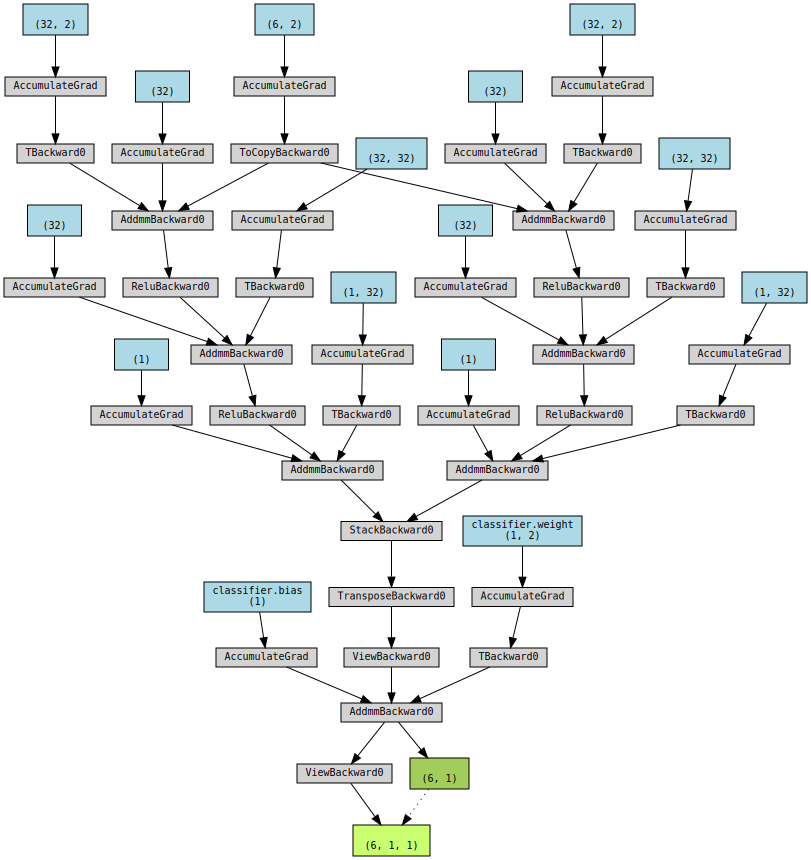

In [7]:
from torchviz import make_dot
make_dot(y_hat, params=dict(model.named_parameters()))
